In [1]:
# Mount Google Drive to access saved files
from google.colab import drive
drive.mount('/content/drive')

# Install required libraries (if not already installed in this session)
!pip install tensorflow opencv-python matplotlib numpy

# Import libraries
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
import pickle
import os
import random


print("Environment set up successfully.")

Mounted at /content/drive
Environment set up successfully.


In [2]:
# Load the saved model
model_path = '/content/drive/My Drive/telugu_character_recognition_model_finetuned.keras'  # Adjust if different
model = tf.keras.models.load_model(model_path)
print("Model loaded successfully.")

# Load the label map
label_map_path = '/content/drive/My Drive/label_map.pkl'
with open(label_map_path, 'rb') as f:
    label_map = pickle.load(f)
print("Label map loaded successfully.")

# Verify label map (optional)
print("Sample of label map:", list(label_map.items())[:5])

Model loaded successfully.
Label map loaded successfully.
Sample of label map: [('ah', 0), ('ii', 1), ('ru', 2), ('e', 3), ('uu', 4)]


In [3]:
# Define English-to-Telugu mapping
english_to_telugu = {
    'a': 'అ', 'aa': 'ఆ', 'ah': 'అః', 'ai': 'ఐ', 'am': 'అం', 'ao': 'ఔ',
    'e': 'ఇ', 'ee': 'ఈ', 'i': 'ఎ', 'ii': 'ఏ', 'o': 'ఒ', 'oo': 'ఓ',
    'ru': 'ఋ', 'ruu': 'ౠ', 'u': 'ఉ', 'uu': 'ఊ',
    'ana': 'ణ', 'ba': 'బ', 'bha': 'భ', 'ch': 'చ', 'cha': 'ఛ',
    'd': 'డ', 'da': 'ద', 'dh': 'ఢ', 'dha': 'ధ', 'ga': 'గ', 'gha': 'ఘ',
    'ha': 'హ', 'jh': 'జ', 'jha': 'ఝ', 'kha': 'ఖ', 'ksh': 'క్ష',
    'I': 'ఇ', 'II': 'ఈ', 'ma': 'మ', 'na': 'న', 'pa': 'ప', 'pha': 'ఫ',
    'ra': 'ర', 'RR': 'ఱ', 'sa': 'స', 's': 'శ', 'sh': 'ష', 'ta': 'ట',
    'tt': 'ఠ', 'th': 'త', 't': 'ట్ట', 'va': 'వ', 'ya': 'య',
    'b': 'బ', 'bh': 'భ', 'g': 'గ', 'gh': 'ఘ', 'h': 'హ', 'in': 'న',
    'jha': 'ఝ', 'ka': 'క', 'ks': 'క్ష', 'm': 'మ', 'n': 'న', 'P': 'ప',
    'ph': 'ఫ', 'r': 'ర', 'rr': 'ఱ', 'v': 'వ', 'y': 'య',
    'thah': 'థ', 'an': 'అం', 'c': 'చ', 'j': 'జ', 'k': 'క', 'kh': 'ఖ',
    'nn': 'ణ', 'pph': 'ఫ', 'z': 'జ','l': 'ల','ll': 'ళ','nga': 'ఙ', 'nya': 'ఞ','Ph': 'ఫ',
    'jna': 'జ్ఞ'
}

# Prediction function with confidence and graph (no font customization)
def predict_image(img_path, model, label_map, english_to_telugu, top_n=5):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Failed to load test image: {img_path}")
        return None, None, None
    img = cv2.resize(img, (32, 32)) / 255.0
    img = img.reshape(1, 32, 32, 1)
    pred = model.predict(img)[0]
    pred_class = np.argmax(pred)
    confidence = pred[pred_class] * 100
    inv_label_map = {v: k for k, v in label_map.items()}
    english_label = inv_label_map[pred_class]
    telugu_label = english_to_telugu.get(english_label, english_label)
    top_indices = np.argsort(pred)[-top_n:][::-1]
    top_probs = pred[top_indices] * 100
    top_english_labels = [inv_label_map[idx] for idx in top_indices]
    top_telugu_labels = [english_to_telugu.get(label, label) for label in top_english_labels]
    plt.figure(figsize=(10, 5))
    plt.bar(top_telugu_labels, top_probs, color='skyblue')
    plt.xlabel('Telugu Characters')
    plt.ylabel('Confidence (%)')
    plt.title(f'Top {top_n} Predictions')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    return telugu_label, confidence, pred

print("Prediction function defined.")

Prediction function defined.


In [4]:
# Copy the zip file from Google Drive to Colab
!cp "/content/drive/My Drive/Final Dataset of Telugu Handwritten Chararcters.zip" /content/

# Unzip the dataset (fix the file name)
!unzip "/content/Final Dataset of Telugu Handwritten Chararcters.zip" -d /content/telugu_dataset

# Verify the extracted structure
base_path = '/content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/'
if os.path.exists(base_path):
    print("Dataset found!")
    print("Folders iyn Test1:", os.listdir(base_path))
else:
    print("Dataset still not found. Please check the zip file structure.")
    !ls /content/telugu_dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/othulu/s/A_0_34.jpeg  
  inflating: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/othulu/s/A_0_3412.jpeg  
  inflating: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/othulu/s/A_0_3425.jpeg  
  inflating: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/othulu/s/A_0_343.jpeg  
  inflating: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/othulu/s/A_0_3437.jpeg  
  inflating: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/othulu/s/A_0_3474.jpeg  
  inflating: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/othulu/s/A_0_3478.jpeg  
  inflating: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/othulu/s/A_0_349.jpeg  
  inflating: /content/tel

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


<ipython-input-3-e449a9071522>:44: UserWarning: Glyph 3120 (\N{TELUGU LETTER RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-e449a9071522>:44: UserWarning: Matplotlib currently does not support Telugu natively.
  plt.tight_layout()
<ipython-input-3-e449a9071522>:44: UserWarning: Glyph 3104 (\N{TELUGU LETTER TTHA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-e449a9071522>:44: UserWarning: Glyph 3095 (\N{TELUGU LETTER GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-e449a9071522>:44: UserWarning: Glyph 3108 (\N{TELUGU LETTER TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-e449a9071522>:44: UserWarning: Glyph 3110 (\N{TELUGU LETTER DA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3120 (\N{TELUGU LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, 

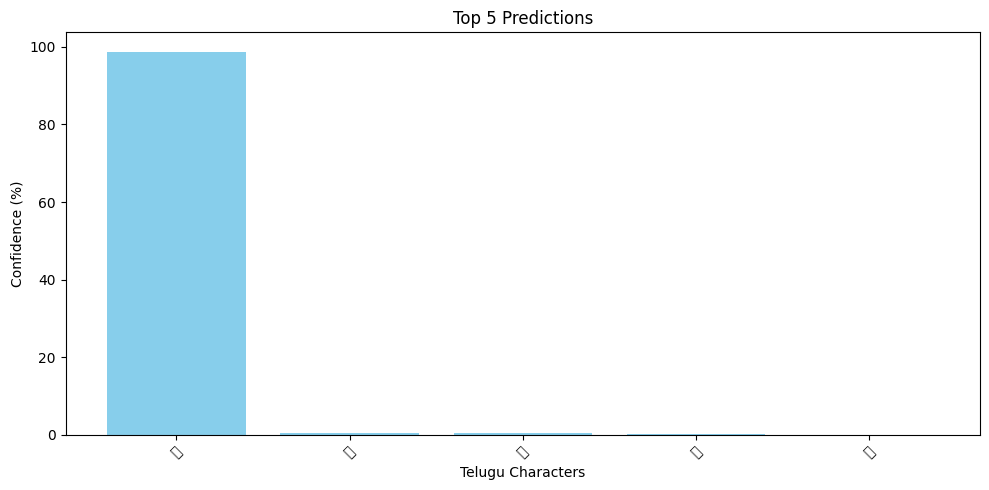

Image: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/othulu/r/A_0_8681.jpeg
Predicted character: ర
Confidence score: 98.81%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


<ipython-input-3-e449a9071522>:44: UserWarning: Glyph 3107 (\N{TELUGU LETTER NNA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-e449a9071522>:44: UserWarning: Glyph 3077 (\N{TELUGU LETTER A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-e449a9071522>:44: UserWarning: Glyph 3074 (\N{TELUGU SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-e449a9071522>:44: UserWarning: Glyph 3088 (\N{TELUGU LETTER AI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-e449a9071522>:44: UserWarning: Glyph 3079 (\N{TELUGU LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3107 (\N{TELUGU LETTER NNA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3077 (\N{TELUGU LETTER A}

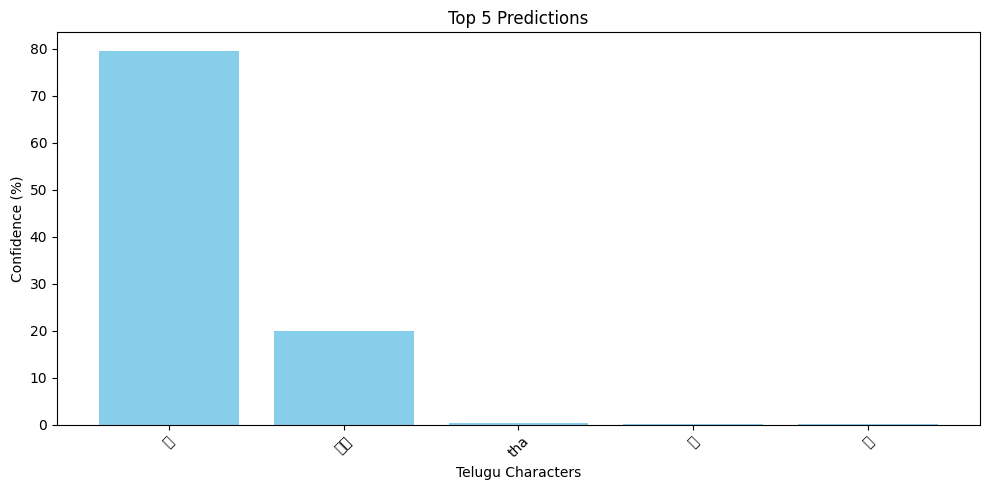

Image: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/hallulu/ana/A_0_6524.jpeg
Predicted character: ణ
Confidence score: 79.52%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


<ipython-input-3-e449a9071522>:44: UserWarning: Glyph 3118 (\N{TELUGU LETTER MA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-e449a9071522>:44: UserWarning: Glyph 3119 (\N{TELUGU LETTER YA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-e449a9071522>:44: UserWarning: Glyph 3093 (\N{TELUGU LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-e449a9071522>:44: UserWarning: Glyph 3149 (\N{TELUGU SIGN VIRAMA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-e449a9071522>:44: UserWarning: Glyph 3127 (\N{TELUGU LETTER SSA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-e449a9071522>:44: UserWarning: Glyph 3101 (\N{TELUGU LETTER JHA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-e449a9071522>:44: UserWarning: Glyph 3129 (\N{TELUGU LETTER HA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packag

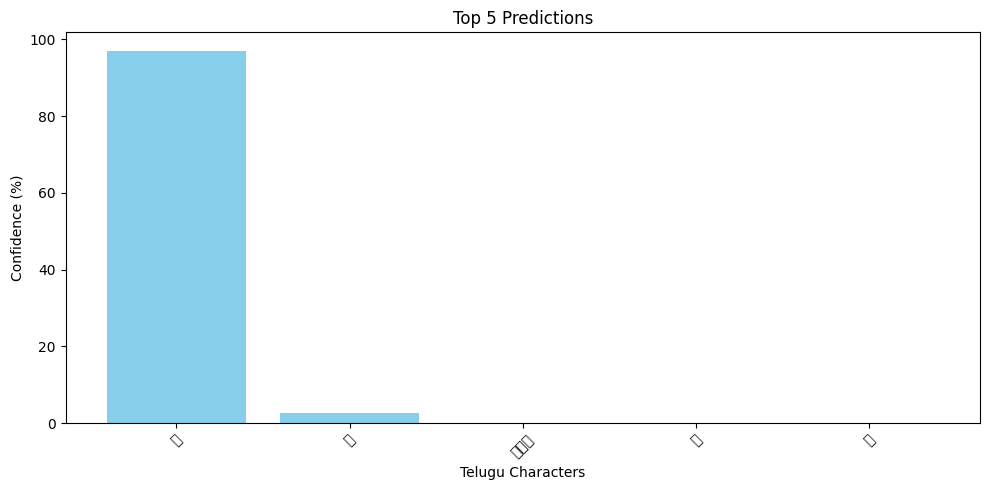

Image: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/hallulu/m/27.jpg
Predicted character: మ
Confidence score: 97.01%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


<ipython-input-3-e449a9071522>:44: UserWarning: Glyph 3122 (\N{TELUGU LETTER LA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-e449a9071522>:44: UserWarning: Glyph 3086 (\N{TELUGU LETTER E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-e449a9071522>:44: UserWarning: Glyph 3128 (\N{TELUGU LETTER SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3122 (\N{TELUGU LETTER LA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3086 (\N{TELUGU LETTER E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3128 (\N{TELUGU LETTER SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


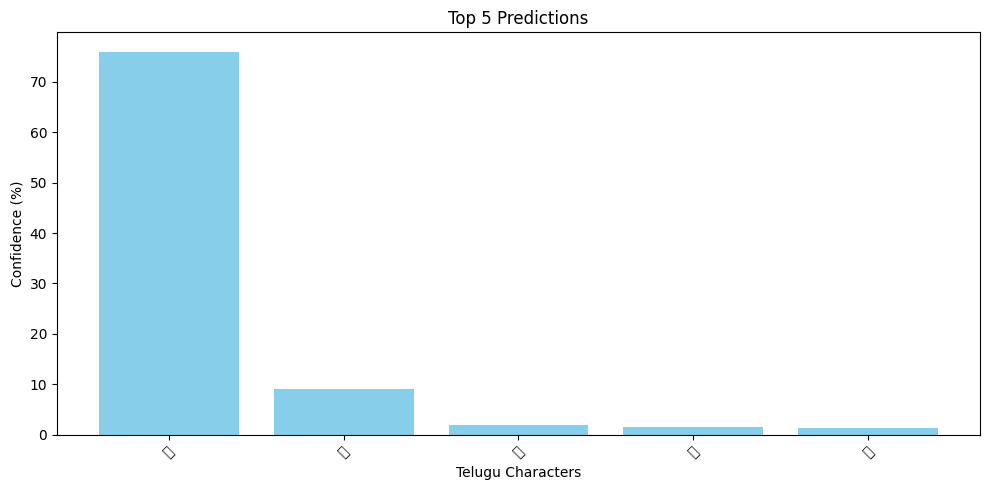

Image: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/hallulu/l/A_0_3910.jpeg
Predicted character: ల
Confidence score: 75.96%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


<ipython-input-3-e449a9071522>:44: UserWarning: Glyph 3111 (\N{TELUGU LETTER DHA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-e449a9071522>:44: UserWarning: Glyph 3109 (\N{TELUGU LETTER THA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-e449a9071522>:44: UserWarning: Glyph 3106 (\N{TELUGU LETTER DDHA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3111 (\N{TELUGU LETTER DHA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3109 (\N{TELUGU LETTER THA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3106 (\N{TELUGU LETTER DDHA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **

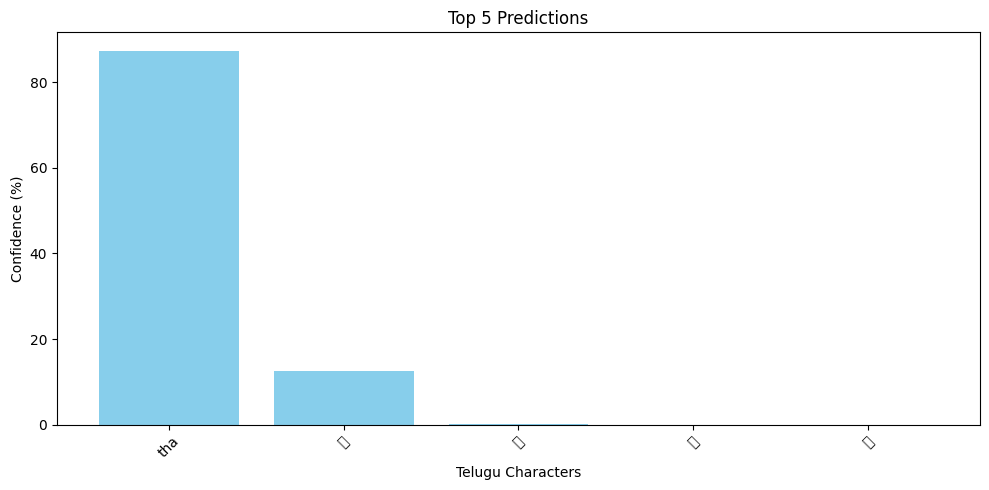

Image: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/othulu/tha/A_0_6337.jpeg
Predicted character: tha
Confidence score: 87.28%



In [5]:
import os
import random

# Define base path and test folders
base_path = '/content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/'
test_folders = ['achulu', 'Guninthamulu', 'hallulu', 'othulu']

# Collect all images
all_images = []
for folder in test_folders:
    folder_path = os.path.join(base_path, folder)
    if not os.path.exists(folder_path):
        print(f"Folder not found: {folder_path}")
        continue
    subfolders = [os.path.join(base_path, folder, sub) for sub in os.listdir(folder_path) if os.path.isdir(os.path.join(base_path, folder, sub))]
    for subfolder in subfolders:
        images = [os.path.join(subfolder, img) for img in os.listdir(subfolder) if img.endswith(('.jpg', '.jpeg', '.png'))]
        all_images.extend(images)

# Simulate test set by taking 20% of total images
if not all_images:
    print("No images found. Please check the dataset structure.")
else:
    test_size = int(0.2 * len(all_images))
    test_paths = random.sample(all_images, test_size)

    # Test 5 random images from this "test set"
    for path in test_paths[:5]:
        predicted_char, confidence, _ = predict_image(path, model, label_map, english_to_telugu)
        if predicted_char:
            print(f"Image: {path}")
            print(f"Predicted character: {predicted_char}")
            print(f"Confidence score: {confidence:.2f}%\n")

In [6]:
# Save English-to-Telugu mapping
with open('/content/drive/My Drive/english_to_telugu_map.pkl', 'wb') as f:
    pickle.dump(english_to_telugu, f)

print("Project components saved successfully.")

Project components saved successfully.


Saving 50.png to 50.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


<ipython-input-3-e449a9071522>:44: UserWarning: Glyph 3121 (\N{TELUGU LETTER RRA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-e449a9071522>:44: UserWarning: Matplotlib currently does not support Telugu natively.
  plt.tight_layout()
<ipython-input-3-e449a9071522>:44: UserWarning: Glyph 3100 (\N{TELUGU LETTER JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-e449a9071522>:44: UserWarning: Glyph 3103 (\N{TELUGU LETTER TTA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-e449a9071522>:44: UserWarning: Glyph 3149 (\N{TELUGU SIGN VIRAMA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3121 (\N{TELUGU LETTER RRA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3100 (\N{TELUGU LETTER JA}) missing f

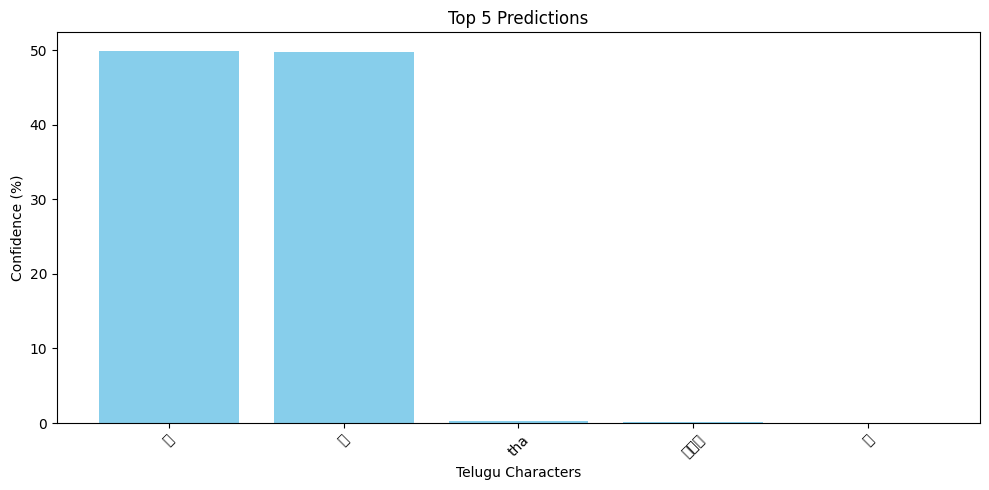

Image: 50.png
Predicted character: ఱ
Confidence score: 49.90%



In [7]:
# Upload new handwritten images
from google.colab import files
uploaded = files.upload()

# Test uploaded images
for img_name in uploaded.keys():
    predicted_char, confidence, _ = predict_image(img_name, model, label_map, english_to_telugu)
    if predicted_char:
        print(f"Image: {img_name}")
        print(f"Predicted character: {predicted_char}")
        print(f"Confidence score: {confidence:.2f}%\n")